In [1]:
import matplotlib.pyplot as plt

import numpy as np

import cv2

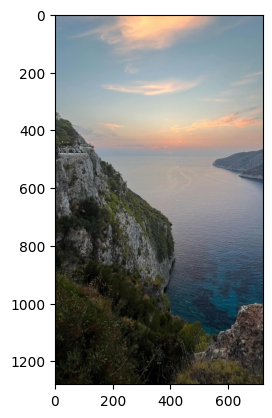

In [2]:
image = cv2.imread('media/Zante2.jpg')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.axis('on')
plt.show()

In [3]:
m = image.shape[0]
n = image.shape[1]


In [4]:
R = image[:, :, 0]

G = image[:, :, 1]

B = image[:, :, 2]

In [5]:
R, G, B

(array([[146, 145, 144, ..., 117, 117, 117],
        [148, 147, 146, ..., 117, 117, 117],
        [149, 148, 147, ..., 117, 117, 117],
        ...,
        [ 16,  18,  19, ...,  54,  57,  54],
        [ 17,  18,  18, ...,  52,  54,  55],
        [  9,   9,  10, ...,  52,  51,  50]], dtype=uint8),
 array([[156, 155, 154, ..., 140, 140, 140],
        [158, 157, 156, ..., 140, 140, 140],
        [159, 158, 157, ..., 140, 140, 140],
        ...,
        [ 17,  19,  20, ...,  42,  45,  42],
        [ 18,  19,  19, ...,  40,  42,  43],
        [ 10,  10,  11, ...,  40,  39,  38]], dtype=uint8),
 array([[166, 165, 164, ..., 156, 156, 156],
        [168, 167, 166, ..., 156, 156, 156],
        [169, 168, 169, ..., 156, 156, 156],
        ...,
        [ 11,  13,  14, ...,  26,  29,  26],
        [ 12,  13,  13, ...,  24,  26,  27],
        [  4,   4,   5, ...,  24,  23,  22]], dtype=uint8))

In [6]:
bayer_array = np.zeros((m, n), dtype = int)

bayer_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [7]:
for i in range(m):
    for j in range(n):
        if i%2 == 0 and j%2 == 0:
            bayer_array[i, j] = R[i, j]
        elif i%2 != 0 and j%2 !=0:
            bayer_array[i, j] = B[i, j]
        else:
            bayer_array[i, j] = G[i, j]

In [8]:
bayer_array

array([[146, 155, 144, ..., 140, 117, 140],
       [158, 167, 156, ..., 156, 140, 156],
       [149, 158, 147, ..., 140, 117, 140],
       ...,
       [ 17,  13,  20, ...,  26,  45,  26],
       [ 17,  19,  18, ...,  40,  54,  43],
       [ 10,   4,  11, ...,  24,  39,  22]])

In [9]:
I2= np.full((m, n, 3), -1)

I2

array([[[-1, -1, -1],
        [-1, -1, -1],
        [-1, -1, -1],
        ...,
        [-1, -1, -1],
        [-1, -1, -1],
        [-1, -1, -1]],

       [[-1, -1, -1],
        [-1, -1, -1],
        [-1, -1, -1],
        ...,
        [-1, -1, -1],
        [-1, -1, -1],
        [-1, -1, -1]],

       [[-1, -1, -1],
        [-1, -1, -1],
        [-1, -1, -1],
        ...,
        [-1, -1, -1],
        [-1, -1, -1],
        [-1, -1, -1]],

       ...,

       [[-1, -1, -1],
        [-1, -1, -1],
        [-1, -1, -1],
        ...,
        [-1, -1, -1],
        [-1, -1, -1],
        [-1, -1, -1]],

       [[-1, -1, -1],
        [-1, -1, -1],
        [-1, -1, -1],
        ...,
        [-1, -1, -1],
        [-1, -1, -1],
        [-1, -1, -1]],

       [[-1, -1, -1],
        [-1, -1, -1],
        [-1, -1, -1],
        ...,
        [-1, -1, -1],
        [-1, -1, -1],
        [-1, -1, -1]]])

In [10]:
R2 = I2[:, :, 0].copy()

G2 = I2[:, :, 1].copy()

B2 = I2[:, :, 2].copy()

In [11]:
R2.shape

(1280, 720)

In [12]:
for i in range(m):
    for j in range(n):
        if i%2 == 0 and j%2 == 0:
            R2[i, j] = bayer_array[i, j]
        elif i%2 != 0 and j%2 !=0:
            B2[i, j] = bayer_array[i, j]
        else:
            G2[i, j] = bayer_array[i, j]

In [13]:
R2

array([[146,  -1, 144, ...,  -1, 117,  -1],
       [ -1,  -1,  -1, ...,  -1,  -1,  -1],
       [149,  -1, 147, ...,  -1, 117,  -1],
       ...,
       [ -1,  -1,  -1, ...,  -1,  -1,  -1],
       [ 17,  -1,  18, ...,  -1,  54,  -1],
       [ -1,  -1,  -1, ...,  -1,  -1,  -1]])

In [14]:
for i in range(m):
    for j in range(n):
        if i % 2 == 0 and j% 2 ==0:
            if i+1 < m and j+1 < n:
                R2[i+1, 1+j] = R2[i, j]
            if j+1 < n:
                R2[i, j+1] = R2[i, j]
            if i+1 < m:
                R2[i+1, j] = R2[i, j]

In [15]:
R2

array([[146, 146, 144, ..., 117, 117, 117],
       [146, 146, 144, ..., 117, 117, 117],
       [149, 149, 147, ..., 117, 117, 117],
       ...,
       [  8,   8,  17, ...,  54,  58,  58],
       [ 17,  17,  18, ...,  49,  54,  54],
       [ 17,  17,  18, ...,  49,  54,  54]])

In [16]:
B2

array([[ -1,  -1,  -1, ...,  -1,  -1,  -1],
       [ -1, 167,  -1, ..., 156,  -1, 156],
       [ -1,  -1,  -1, ...,  -1,  -1,  -1],
       ...,
       [ -1,  13,  -1, ...,  26,  -1,  26],
       [ -1,  -1,  -1, ...,  -1,  -1,  -1],
       [ -1,   4,  -1, ...,  24,  -1,  22]])

In [17]:
for i in range(m):
    for j in range(n):
        if i % 2 != 0 and j % 2 != 0:
            B2[i-1, j-1] = B2[i, j]
            B2[i, j-1] = B2[i, j]
            B2[i-1, j] = B2[i, j]    
        
    
for i in range(m):
    for j in range(n):         
        if j == n-1:
            B2[i, j] = B2[i, j-1]  
        if i == m-1:
            B2[i, j] = B2[i-1, j]

In [18]:
B2
        

array([[167, 167, 166, ..., 156, 156, 156],
       [167, 167, 166, ..., 156, 156, 156],
       [169, 169, 169, ..., 156, 156, 156],
       ...,
       [ 13,  13,  12, ...,  26,  26,  26],
       [  4,   4,   7, ...,  24,  22,  22],
       [  4,   4,   7, ...,  24,  22,  22]])

In [19]:
G2

array([[ -1, 155,  -1, ..., 140,  -1, 140],
       [158,  -1, 156, ...,  -1, 140,  -1],
       [ -1, 158,  -1, ..., 140,  -1, 140],
       ...,
       [ 17,  -1,  20, ...,  -1,  45,  -1],
       [ -1,  19,  -1, ...,  40,  -1,  43],
       [ 10,  -1,  11, ...,  -1,  39,  -1]])

In [20]:
for i in range(m):
    for j in range(1, n, 2):
        if i % 2 == 0:
            G2[i, j - 1] = G2[i, j]
            if j == n-2:
                G2[i, j+1] = G2[i, j]

In [21]:
for i in range(m):
    for j in range(0, n, 2):
        if i % 2 != 0 and j+1 < n:
            G2[i, j + 1] = G2[i, j]

In [22]:
G2

array([[155, 155, 153, ..., 140, 140, 140],
       [158, 158, 156, ..., 140, 140, 140],
       [158, 158, 155, ..., 140, 140, 140],
       ...,
       [ 17,  17,  20, ...,  36,  45,  45],
       [ 19,  19,  18, ...,  40,  43,  43],
       [ 10,  10,  11, ...,  40,  39,  39]])

In [23]:
I2[:, :,0] = R2

I2[:, :,1] = G2

I2[:, :,2] = B2

I2

array([[[146, 155, 167],
        [146, 155, 167],
        [144, 153, 166],
        ...,
        [117, 140, 156],
        [117, 140, 156],
        [117, 140, 156]],

       [[146, 158, 167],
        [146, 158, 167],
        [144, 156, 166],
        ...,
        [117, 140, 156],
        [117, 140, 156],
        [117, 140, 156]],

       [[149, 158, 169],
        [149, 158, 169],
        [147, 155, 169],
        ...,
        [117, 140, 156],
        [117, 140, 156],
        [117, 140, 156]],

       ...,

       [[  8,  17,  13],
        [  8,  17,  13],
        [ 17,  20,  12],
        ...,
        [ 54,  36,  26],
        [ 58,  45,  26],
        [ 58,  45,  26]],

       [[ 17,  19,   4],
        [ 17,  19,   4],
        [ 18,  18,   7],
        ...,
        [ 49,  40,  24],
        [ 54,  43,  22],
        [ 54,  43,  22]],

       [[ 17,  10,   4],
        [ 17,  10,   4],
        [ 18,  11,   7],
        ...,
        [ 49,  40,  24],
        [ 54,  39,  22],
        [ 54,  39,  22]]

In [24]:
image

array([[[146, 156, 166],
        [145, 155, 165],
        [144, 154, 164],
        ...,
        [117, 140, 156],
        [117, 140, 156],
        [117, 140, 156]],

       [[148, 158, 168],
        [147, 157, 167],
        [146, 156, 166],
        ...,
        [117, 140, 156],
        [117, 140, 156],
        [117, 140, 156]],

       [[149, 159, 169],
        [148, 158, 168],
        [147, 157, 169],
        ...,
        [117, 140, 156],
        [117, 140, 156],
        [117, 140, 156]],

       ...,

       [[ 16,  17,  11],
        [ 18,  19,  13],
        [ 19,  20,  14],
        ...,
        [ 54,  42,  26],
        [ 57,  45,  29],
        [ 54,  42,  26]],

       [[ 17,  18,  12],
        [ 18,  19,  13],
        [ 18,  19,  13],
        ...,
        [ 52,  40,  24],
        [ 54,  42,  26],
        [ 55,  43,  27]],

       [[  9,  10,   4],
        [  9,  10,   4],
        [ 10,  11,   5],
        ...,
        [ 52,  40,  24],
        [ 51,  39,  23],
        [ 50,  38,  22]]

In [25]:
image.shape

(1280, 720, 3)

In [26]:
I2.shape

(1280, 720, 3)

In [27]:
mse = np.mean((image - I2) ** 2)

print(f"MSE: {mse}")

MSE: 86.66362340856482


In [28]:
max_pixel_value = 255.0

psnr = 10 * np.log10((max_pixel_value ** 2) / mse)

print(f"PSNR: {psnr}")

PSNR: 28.752435179252863


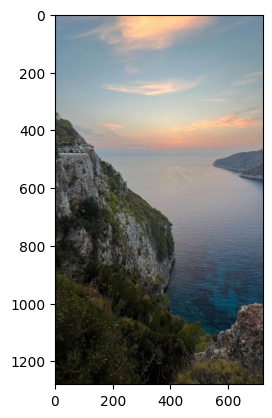

In [29]:
plt.imshow(I2)

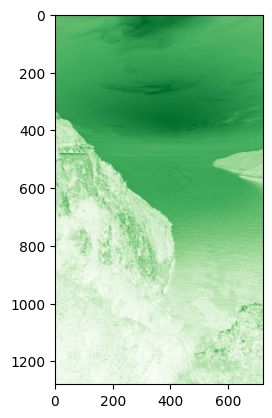

In [30]:
plt.imshow(G2, cmap= 'Greens')

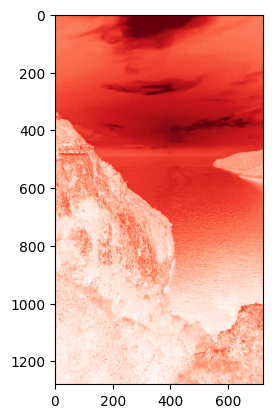

In [31]:
plt.imshow(R2, cmap= 'Reds')

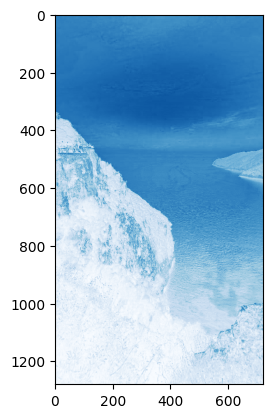

In [32]:
plt.imshow(B2, cmap = 'Blues')

New method

In [33]:
R2 = np.zeros((m, n, 3),dtype= "uint8")
for i in range(m):
    for j in range(n):
        for z in range(3):
            R2[i, j, 0] = R[i, j]

In [34]:
G2 = np.zeros((m, n, 3), dtype = "uint8")

for i in range(m):
    for j in range(n):
        for z in range(3):
            G2[i, j, 1] = G[i, j]

In [35]:
B2 = np.zeros((m, n, 3), dtype = "uint8")

for i in range(m):
    for j in range(n):
        for z in range(3):
            B2[i, j, 2] = B[i, j]

In [45]:
p1 = np.zeros((m, n, 3), dtype = "uint8")

In [46]:
for i in range(m):
    for j in range(0, n, 2):
        for z in range(3):
            if i % 2 == 0:
                p1[i, j, 1] = G2[i, j, 1]
            if i % 2 != 0:
                p1[i, j, 2] = B2[i, j, 2]

In [47]:
p1

array([[[  0, 156,   0],
        [  0,   0,   0],
        [  0, 154,   0],
        ...,
        [  0,   0,   0],
        [  0, 140,   0],
        [  0,   0,   0]],

       [[  0,   0, 168],
        [  0,   0,   0],
        [  0,   0, 166],
        ...,
        [  0,   0,   0],
        [  0,   0, 156],
        [  0,   0,   0]],

       [[  0, 159,   0],
        [  0,   0,   0],
        [  0, 157,   0],
        ...,
        [  0,   0,   0],
        [  0, 140,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,  11],
        [  0,   0,   0],
        [  0,   0,  14],
        ...,
        [  0,   0,   0],
        [  0,   0,  29],
        [  0,   0,   0]],

       [[  0,  18,   0],
        [  0,   0,   0],
        [  0,  19,   0],
        ...,
        [  0,   0,   0],
        [  0,  42,   0],
        [  0,   0,   0]],

       [[  0,   0,   4],
        [  0,   0,   0],
        [  0,   0,   5],
        ...,
        [  0,   0,   0],
        [  0,   0,  23],
        [  0,   0,   0]]

In [48]:
for i in range(m):
    for j in range(1, n, 2):
        for z in range(3):
            if i % 2 == 0:
                p1[i, j, 0] = R2[i, j, 0]
            if i % 2 != 0:
                p1[i, j, 1] = G2[i, j, 1]

In [49]:
p1

array([[[  0, 156,   0],
        [145,   0,   0],
        [  0, 154,   0],
        ...,
        [117,   0,   0],
        [  0, 140,   0],
        [117,   0,   0]],

       [[  0,   0, 168],
        [  0, 157,   0],
        [  0,   0, 166],
        ...,
        [  0, 140,   0],
        [  0,   0, 156],
        [  0, 140,   0]],

       [[  0, 159,   0],
        [148,   0,   0],
        [  0, 157,   0],
        ...,
        [117,   0,   0],
        [  0, 140,   0],
        [117,   0,   0]],

       ...,

       [[  0,   0,  11],
        [  0,  19,   0],
        [  0,   0,  14],
        ...,
        [  0,  42,   0],
        [  0,   0,  29],
        [  0,  42,   0]],

       [[  0,  18,   0],
        [ 18,   0,   0],
        [  0,  19,   0],
        ...,
        [ 52,   0,   0],
        [  0,  42,   0],
        [ 55,   0,   0]],

       [[  0,   0,   4],
        [  0,  10,   0],
        [  0,   0,   5],
        ...,
        [  0,  40,   0],
        [  0,   0,  23],
        [  0,  38,   0]]

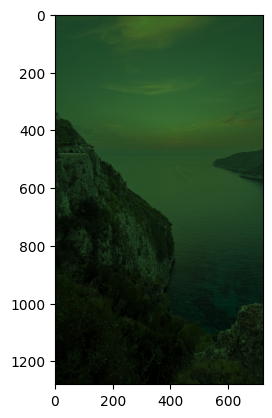

In [50]:


plt.imshow(p1)

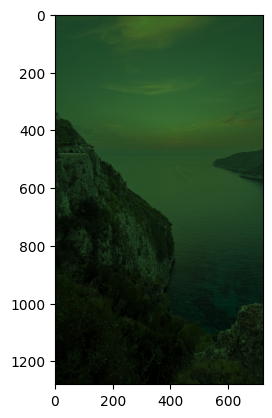

In [51]:
plt.imshow(p1, cmap = 'gray')